## Vaccination rate: 50% (Lägre än IDAHO)

In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt

N = 100000
width = 140
height = 70
initial_infected = 1
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

S_history = []
I_history = []
R_history = []
D_history = []

for t in range(timesteps):
    model.step()
    S_history.append(model.count_status("S"))
    I_history.append(model.count_status("I"))
    R_history.append(model.count_status("R"))
    D_history.append(model.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))



S: 15
I: 0
R: 98965
D: 1020


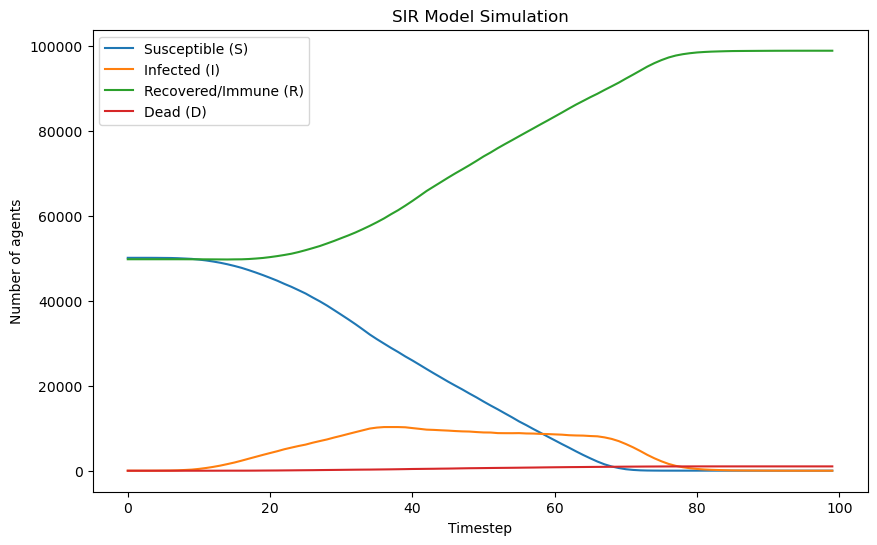

In [2]:

plt.figure(figsize=(10,6))
plt.plot(S_history, label="Susceptible (S)")
plt.plot(I_history, label="Infected (I)")
plt.plot(R_history, label="Recovered/Immune (R)")
plt.plot(D_history, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()


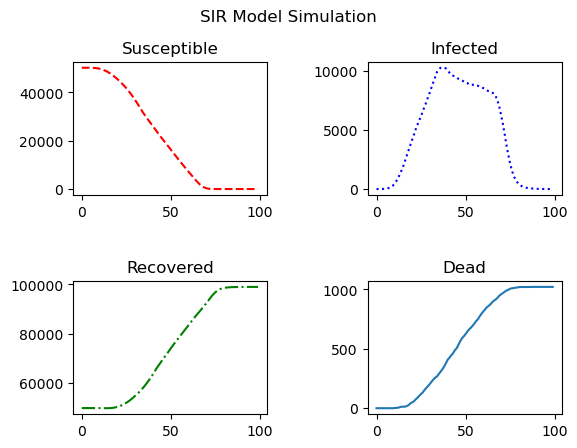

In [3]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [4]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

Re = 1.917777966533594


In [5]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

In [6]:
agent_df.head()

Agent status Agent position  New Infected
Step AgentID                                          
1    0                  I      (137, 42)             0
     1                  R       (79, 40)             0
     2                  R       (19, 32)             0
     3                  S       (17, 40)             0
     4                  S       (85, 62)             0

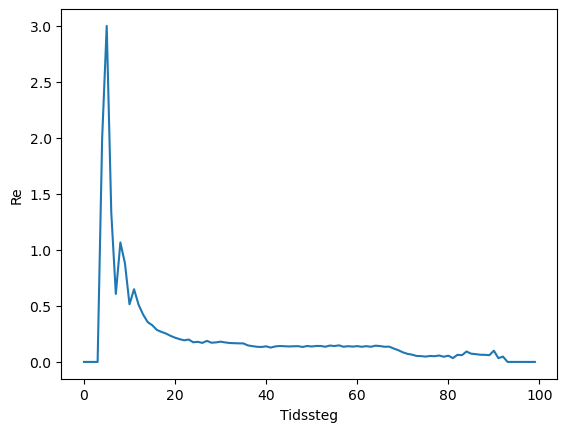

In [7]:
plt.plot(model_df)

plt.xlabel("Tidssteg")
plt.ylabel("Re")
plt.show()

## Vaccination rate: 78.% (IDAHO)

In [8]:
vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

S_history_2 = []
I_history_2 = []
R_history_2 = []
D_history_2 = []

for t in range(timesteps):
    model_2.step()
    S_history_2.append(model_2.count_status("S"))
    I_history_2.append(model_2.count_status("I"))
    R_history_2.append(model_2.count_status("R"))
    D_history_2.append(model_2.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 4060
I: 2772
R: 92741
D: 427


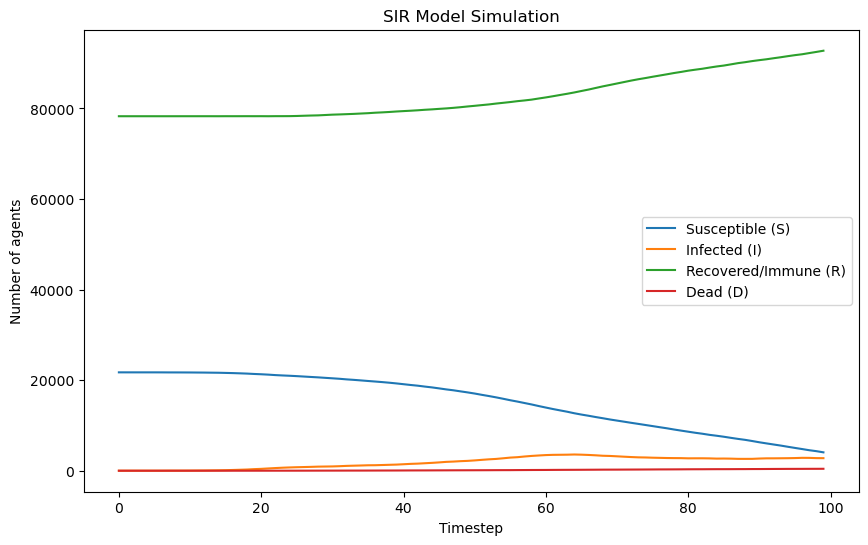

In [9]:
plt.figure(figsize=(10,6))
plt.plot(S_history_2, label="Susceptible (S)")
plt.plot(I_history_2, label="Infected (I)")
plt.plot(R_history_2, label="Recovered/Immune (R)")
plt.plot(D_history_2, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

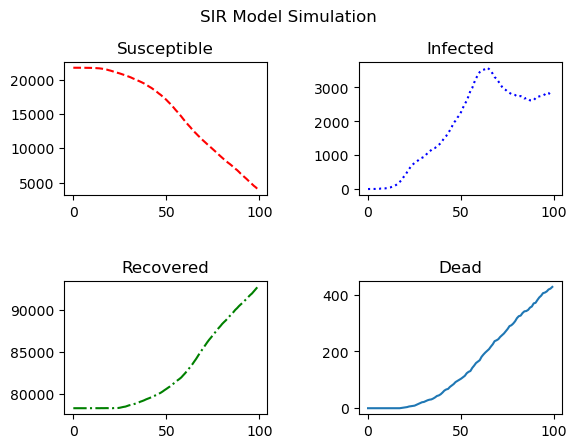

In [10]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_2,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_2,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_2,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_2, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [11]:
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

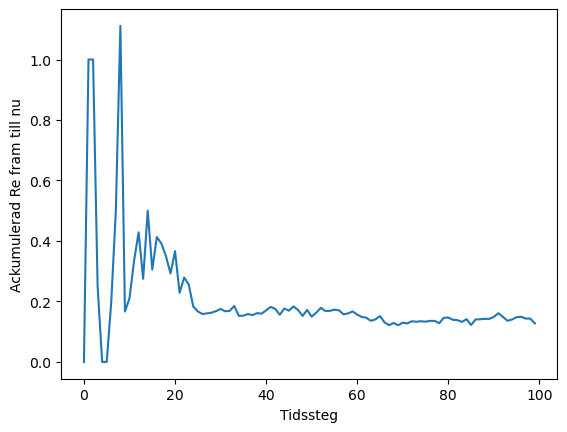

In [12]:
plt.plot(model_df_2)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

## Vaccination rate: 95 % (önskad vaccinationstäckning)

In [13]:
vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

S_history_3 = []
I_history_3 = []
R_history_3 = []
D_history_3 = []

for t in range(timesteps):
    model_3.step()
    S_history_3.append(model_3.count_status("S"))
    I_history_3.append(model_3.count_status("I"))
    R_history_3.append(model_3.count_status("R"))
    D_history_3.append(model_3.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 4953
I: 0
R: 95047
D: 0


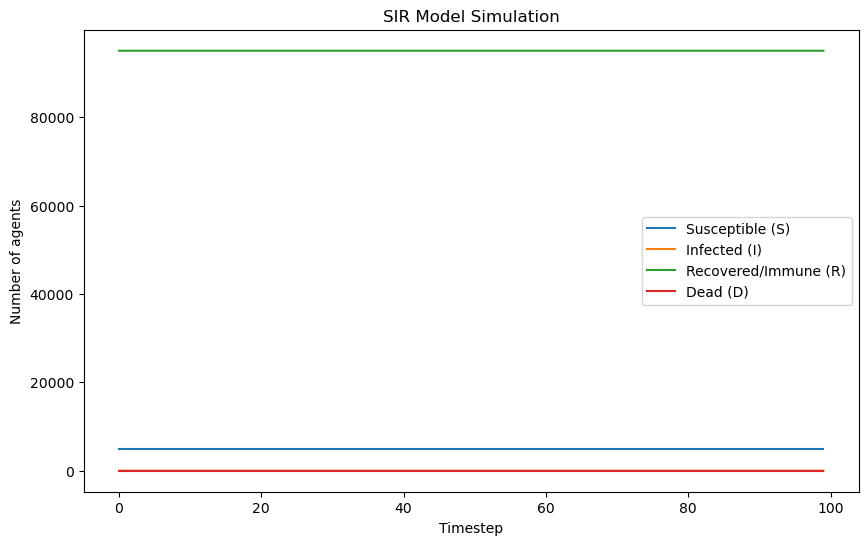

In [14]:
plt.figure(figsize=(10,6))
plt.plot(S_history_3, label="Susceptible (S)")
plt.plot(I_history_3, label="Infected (I)")
plt.plot(R_history_3, label="Recovered/Immune (R)")
plt.plot(D_history_3, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

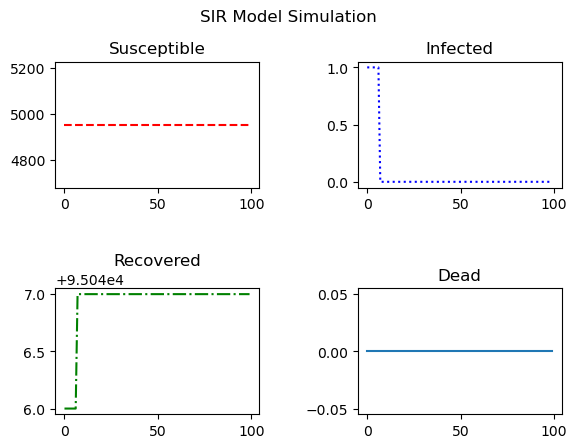

In [15]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_3,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_3,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_3,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_3, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [16]:
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

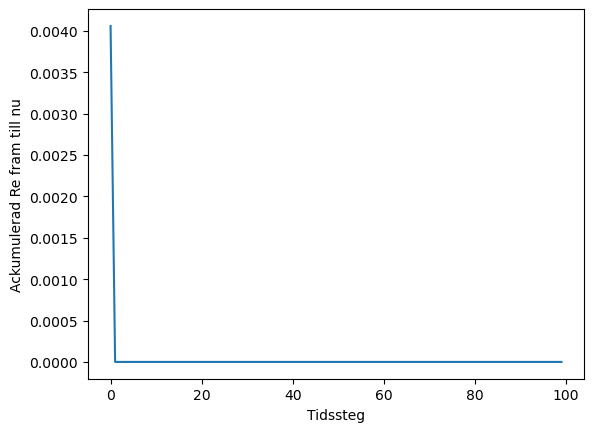

In [17]:
plt.plot(model_df_3)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()